# Noise reduction 

In [52]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import the required libraries

In [53]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

### Load data

#### Import the audio files from the git repository

In [54]:
url = "https://raw.githubusercontent.com/rajatjhalani/noise-removal/master/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [55]:
IPython.display.Audio(data=data, rate=rate)

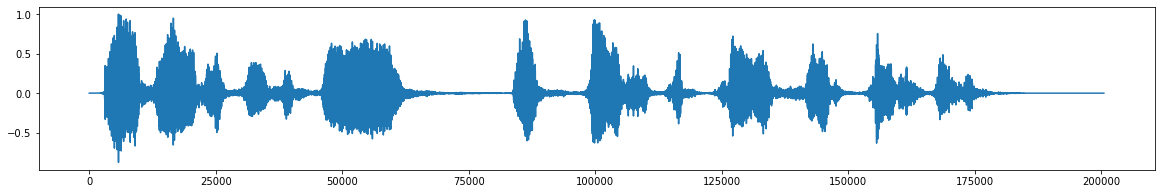

In [56]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### Add noise to the audio file imported 

In [57]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

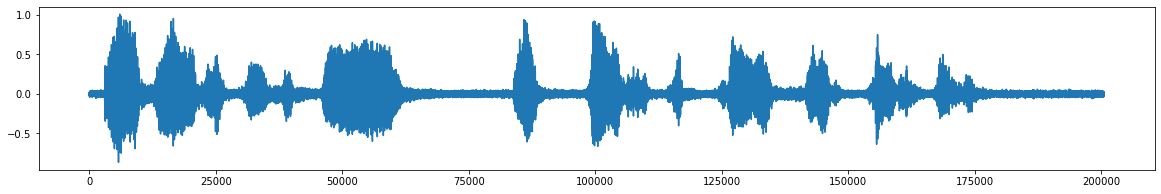

In [58]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [59]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

### Remove noise

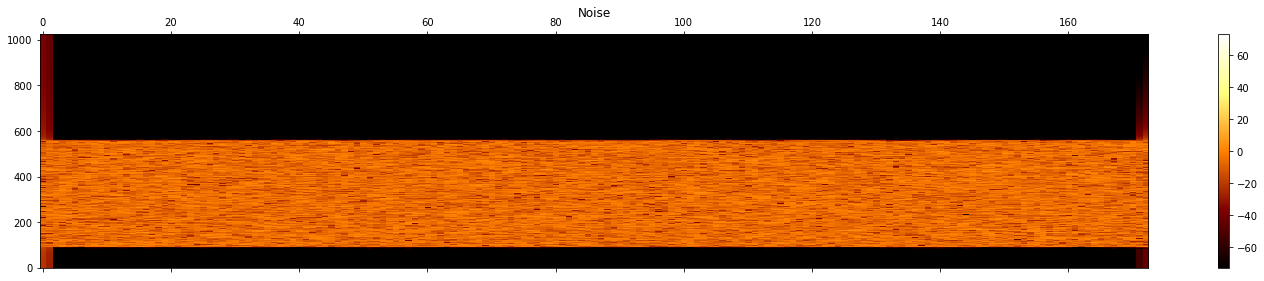

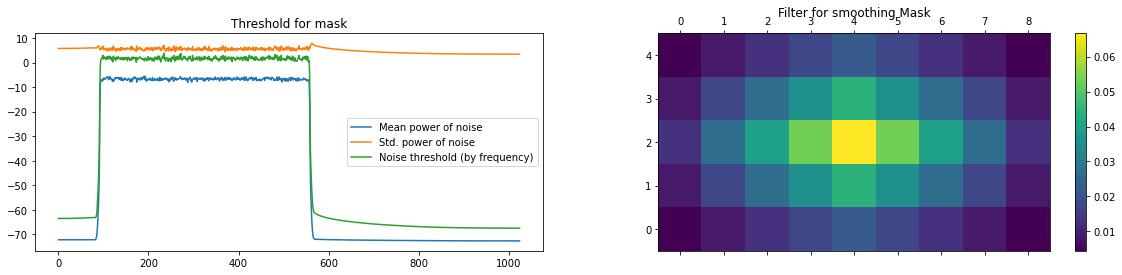

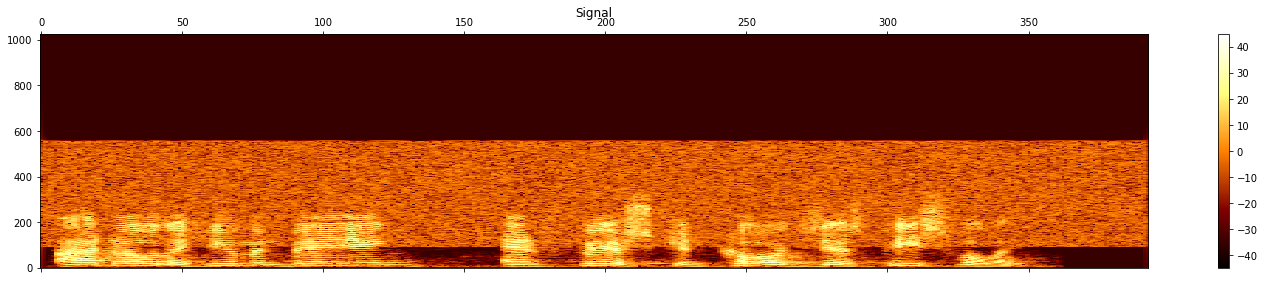

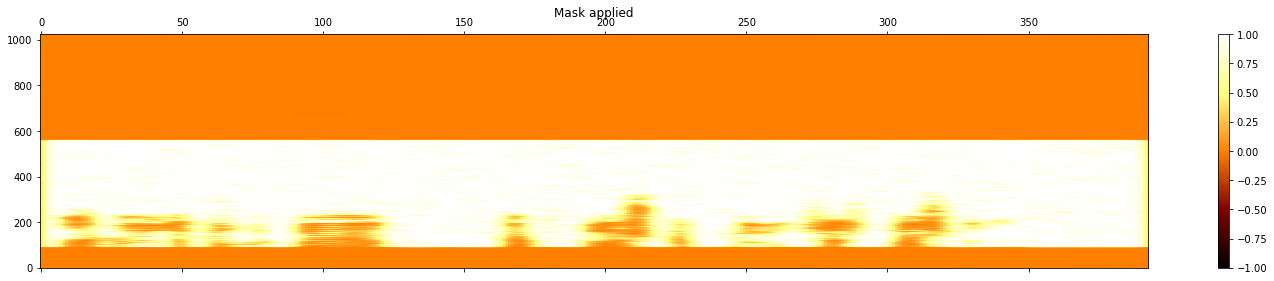

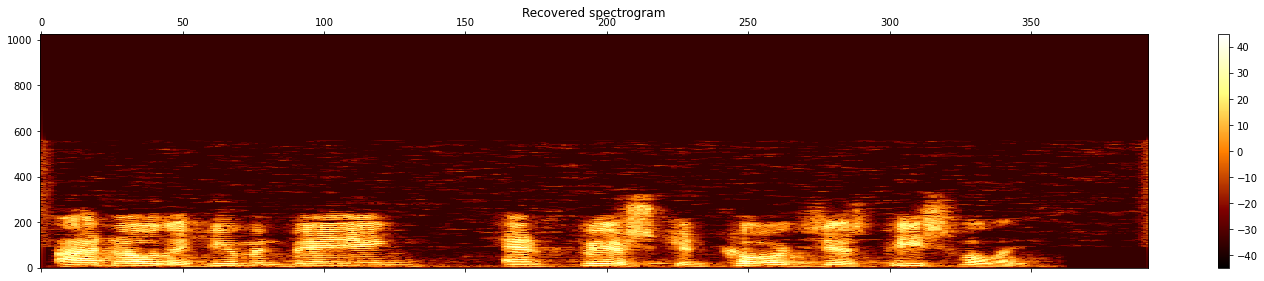

In [60]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

##### Playback recovered audio

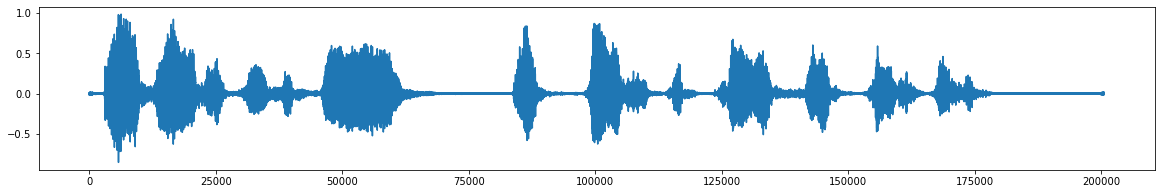

In [61]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [62]:
IPython.display.Audio(data=noise_reduced, rate=rate)

## Another example 

#### Importing a noise audio file to combine with the original audio file

In [63]:
url = "https://raw.githubusercontent.com/rajatjhalani/noise-removal/master/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

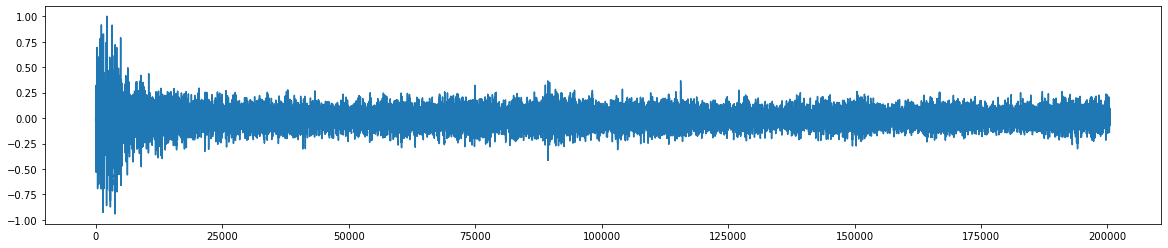

In [64]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [65]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

In [66]:
max(noise_data)

0.999969482421875

### Add noise to data

In [67]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

### Plot noisy data

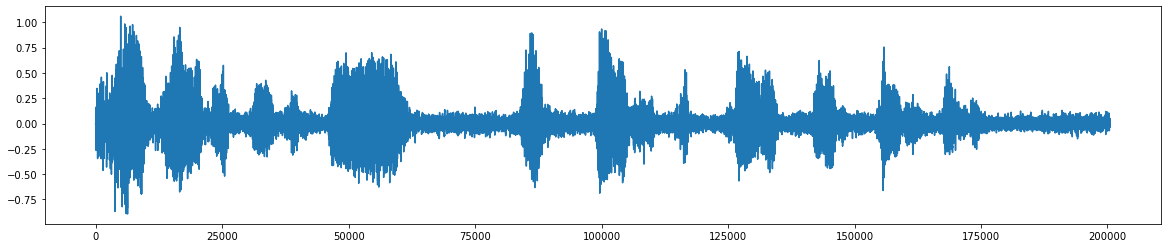

In [68]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

### Remove noise

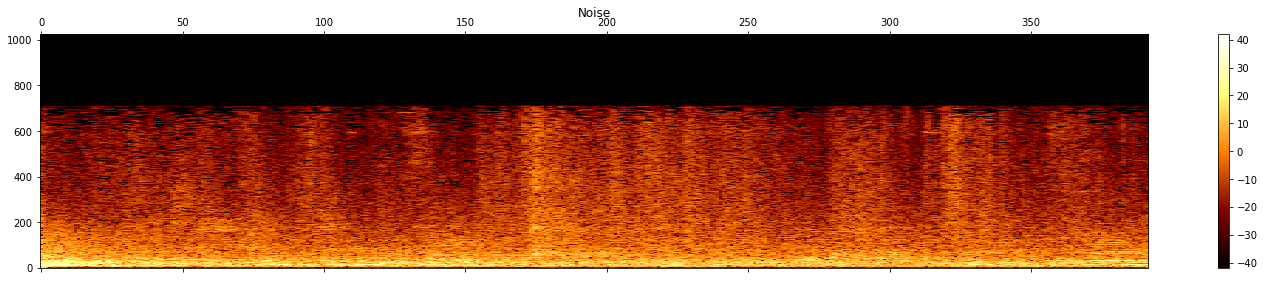

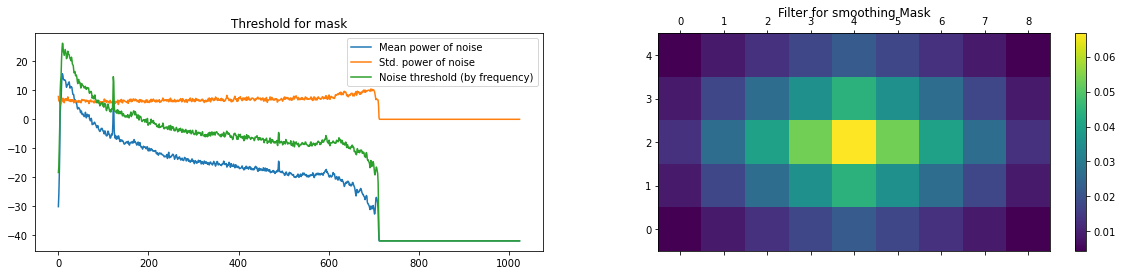

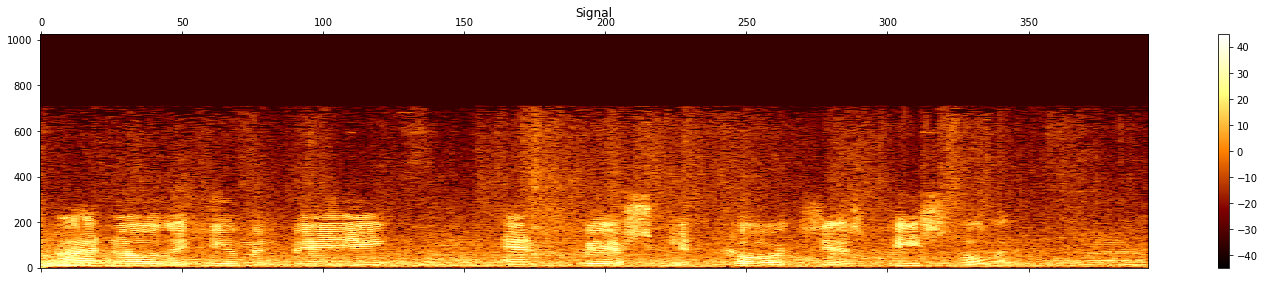

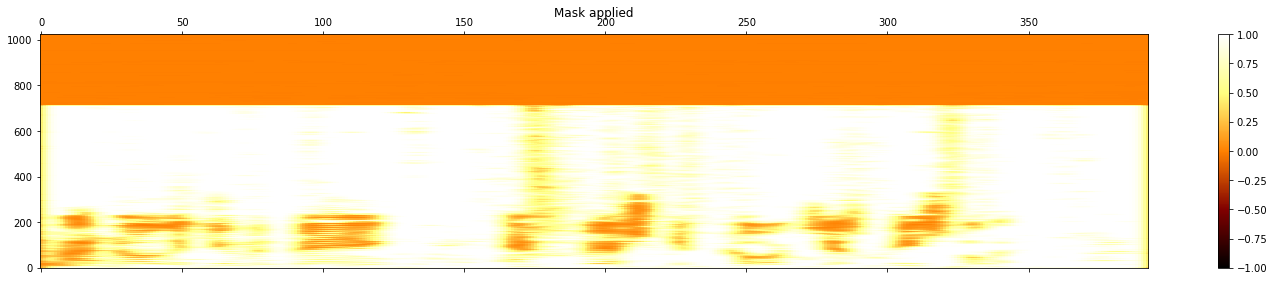

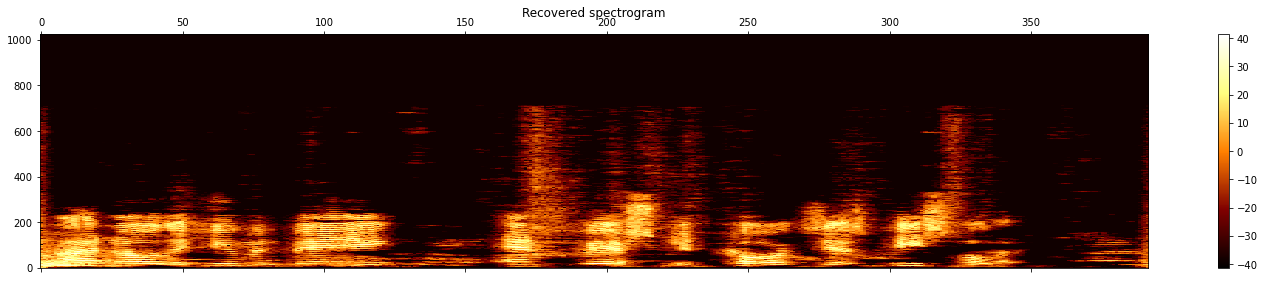

In [69]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe, noise_clip=noise_clip, verbose=True)

##### Playback recovered audio

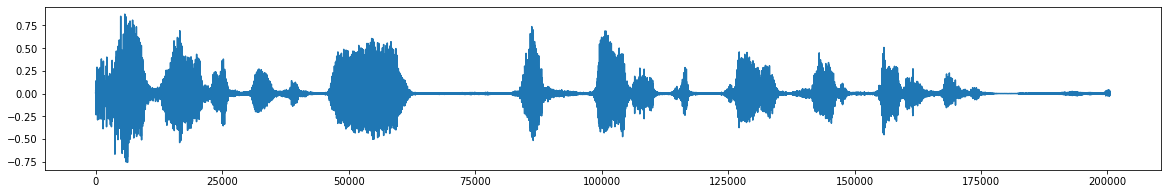

In [70]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [71]:
IPython.display.Audio(data=noise_reduced, rate=rate)